In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

sns.set()

# Linear Regression

In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df = df[['YearsExperience', 'Salary']]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [4]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 2 entries, YearsExperience to Salary
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


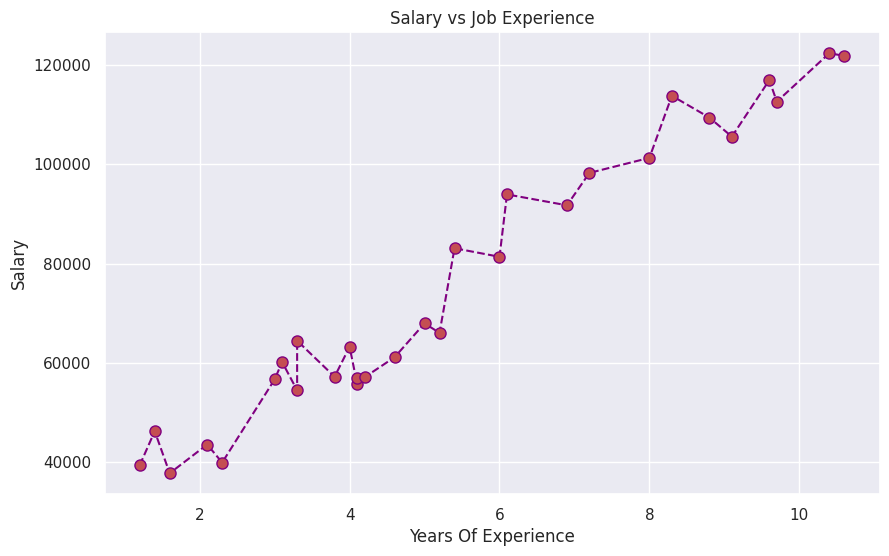

In [6]:
plt.figure(figsize = (10,6))
plt.plot(df.YearsExperience,df.Salary,marker = 'o',markersize = 8, mfc='r',c = 'purple',linestyle = '--')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.title("Salary vs Job Experience")
plt.show()

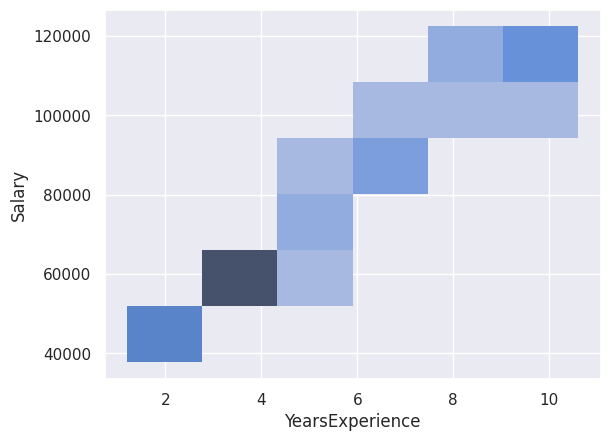

In [7]:
# checking out the ditribution
sns.histplot(df,y = 'Salary',x ='YearsExperience',kde = True)
plt.show()
#increasing plot

In [8]:
X = df['YearsExperience']
y = df['Salary']

Text(0.5, 1.0, 'Salary vs Job Experience')

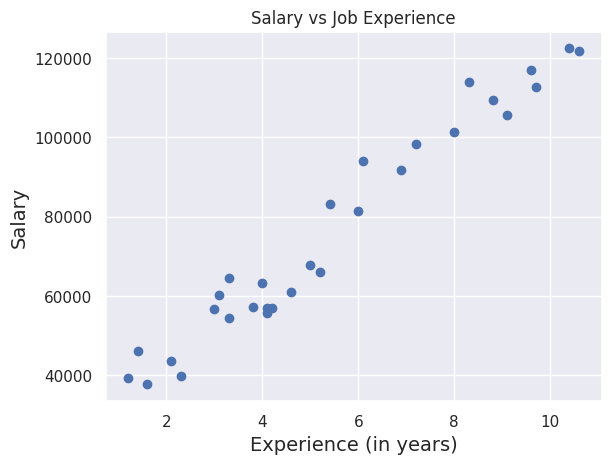

In [9]:
plt.scatter(X,y)
plt.xlabel('Experience (in years)', fontsize =14)
plt.ylabel('Salary', fontsize =14)
plt.title("Salary vs Job Experience")

In [10]:
X = X.values.reshape(-1,1)
X.shape

(30, 1)

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X,y)

LinearRegression()

In [13]:
#R2 score
reg.score(X,y)

0.9569566641435086

Regression Co-efficient = 9449.96 
Regression Intercept = 24848.20




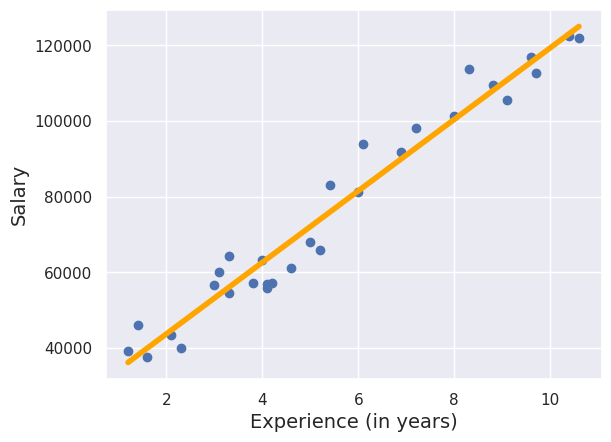

In [14]:
print(f"Regression Co-efficient = {reg.coef_[0]:.2f} \nRegression Intercept = {reg.intercept_:.2f}\n\n")

plt.scatter(X,y)
yhat = reg.coef_*X + reg.intercept_
fig = plt.plot(X,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Experience (in years)', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.show()

In [15]:
print(f"The predicted salary of an employee with experience of 9.9 years is : {reg.predict(np.array(8.3).reshape(-1,1))[0]:.2f}")

The predicted salary of an employee with experience of 9.9 years is : 103282.89


# SVM 

In [16]:
df = pd.read_csv('/kaggle/input/rock-or-mine-classification/ROCK_OR_MINE.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [17]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Columns: 61 entries, 0.0200 to R
dtypes: float64(60), object(1)
memory usage: 98.8+ KB


In [18]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<Axes: >

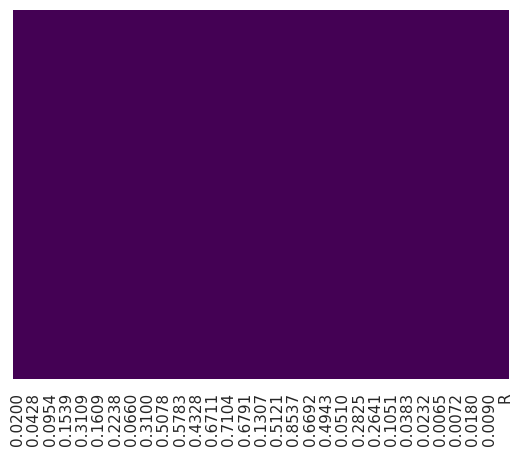

In [19]:
# Checking for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df.describe(include='O')

,R
count,207
unique,2
top,M
freq,111


In [21]:
df['R'].unique()

array(['R', 'M'], dtype=object)

In [22]:
def helper(val):
    if val == 'R':
        return 0
    elif val == 'M':
        return 1

In [23]:
df['R'] = df['R'].map(helper)

In [24]:
df.rename(columns = {'R':'isMine'}, inplace = True)

In [25]:
df.head(2)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,isMine
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0


In [26]:
 from sklearn.svm import SVC

In [27]:
X = df.iloc[:, 0:60] # Features
y = df.iloc[:,60] # Target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [29]:
model_lin = SVC(kernel='linear')
model_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [30]:
model_rbf = SVC(C = 10, gamma = 'scale', kernel = 'rbf')
model_rbf.fit(X_train,y_train)

SVC(C=10)

In [31]:
y_pred_linear = model_lin.predict(X_test)

In [32]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {(accuracy*100):.2f}%")

Accuracy: 76.19%


In [33]:
# Classification report 

class_report = classification_report(y_test, y_pred_linear)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.90      0.70      0.79        27

    accuracy                           0.76        42
   macro avg       0.76      0.79      0.76        42
weighted avg       0.80      0.76      0.77        42



In [34]:

y_pred_rbf = model_rbf.predict(X_test)

In [35]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {(accuracy*100):.2f}%")

Accuracy: 78.57%


In [36]:
# Classification report 

class_report = classification_report(y_test, y_pred_rbf)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.85      0.81      0.83        27

    accuracy                           0.79        42
   macro avg       0.77      0.77      0.77        42
weighted avg       0.79      0.79      0.79        42



# KNN

In [37]:
df = pd.read_csv('/kaggle/input/harumanis-mango-physical-measurement/data-2023-01-18.csv')
df.head()

,No,Weight,Length,Circumference,Grade
0,1,486.5,14.0,27.0,A
1,2,388.4,12.0,26.0,A
2,3,493.7,12.0,26.5,A
3,4,342.5,10.0,24.3,A
4,5,401.5,11.0,25.0,A


In [38]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             105 non-null    int64  
 1   Weight         105 non-null    float64
 2   Length         105 non-null    float64
 3   Circumference  105 non-null    float64
 4   Grade          105 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.2+ KB


,count,mean,std,min,25%,50%,75%,max
No,105.0,53.000000,30.454885,1.0,27.0,53.0,79.0,105.0
Weight,105.0,351.010476,74.172386,235.0,290.5,341.7,407.9,571.9
Length,105.0,11.988571,1.250486,10.0,10.9,11.8,12.8,15.4
Circumference,105.0,23.820952,2.235238,20.3,21.7,24.0,25.8,29.9


In [39]:
df.isnull().sum()

No               0
Weight           0
Length           0
Circumference    0
Grade            0
dtype: int64

In [40]:
df.drop(labels = 'No',axis = 1,inplace = True)
df.groupby('Grade').mean()

,Weight,Length,Circumference
Grade,,,
A,412.126471,12.944118,26.117647
B,367.160606,12.178788,24.130303
C,282.302632,10.968421,21.497368


<Figure size 1280x960 with 0 Axes>

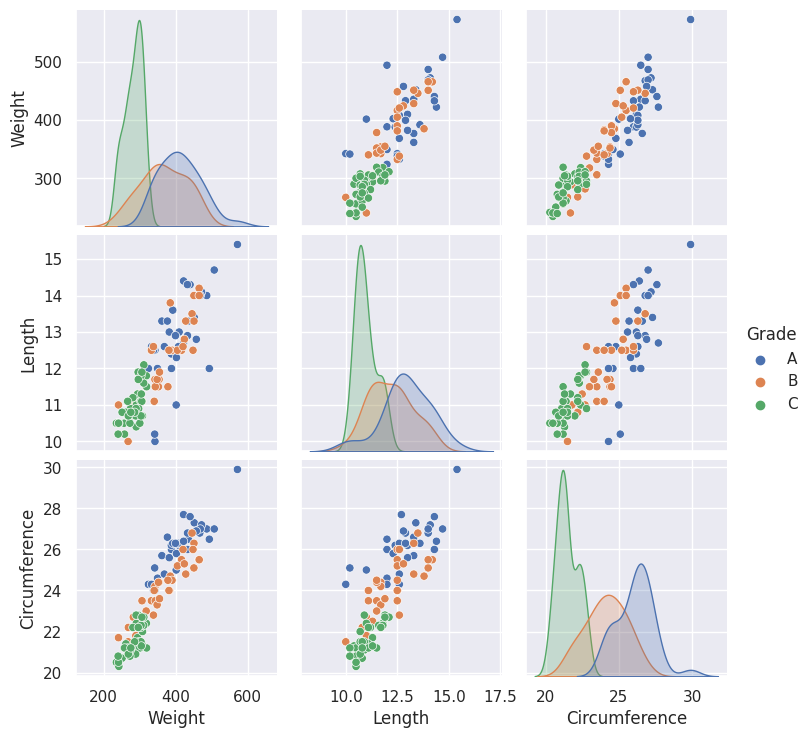

In [41]:
plt.figure(dpi = 200)
sns.pairplot(df,hue = 'Grade')

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [43]:
cols = ['Grade']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [44]:
type(df['Grade'][0])

numpy.int64

In [45]:
df.head()

,Weight,Length,Circumference,Grade
0,486.5,14.0,27.0,0
1,388.4,12.0,26.0,0
2,493.7,12.0,26.5,0
3,342.5,10.0,24.3,0
4,401.5,11.0,25.0,0


In [46]:
X = df.drop(['Grade'], axis=1)
y = df['Grade']

In [47]:
X.head()

,Weight,Length,Circumference
0,486.5,14.0,27.0
1,388.4,12.0,26.0
2,493.7,12.0,26.5
3,342.5,10.0,24.3
4,401.5,11.0,25.0


In [48]:
 y.tail()

100    2
101    2
102    2
103    2
104    2
Name: Grade, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [50]:
X_train.shape , y_train.shape

((84, 3), (84,))

In [51]:
model = KNeighborsClassifier(n_neighbors=3)

In [52]:
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_pred = model.predict(X_test)

In [54]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.76%


In [55]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.50      0.20      0.29         5
           2       0.70      1.00      0.82         7

    accuracy                           0.76        21
   macro avg       0.70      0.70      0.67        21
weighted avg       0.73      0.76      0.72        21



In [56]:
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n\n", confusion_mat)

Confusion Matrix:

 [[8 1 0]
 [1 1 3]
 [0 0 7]]


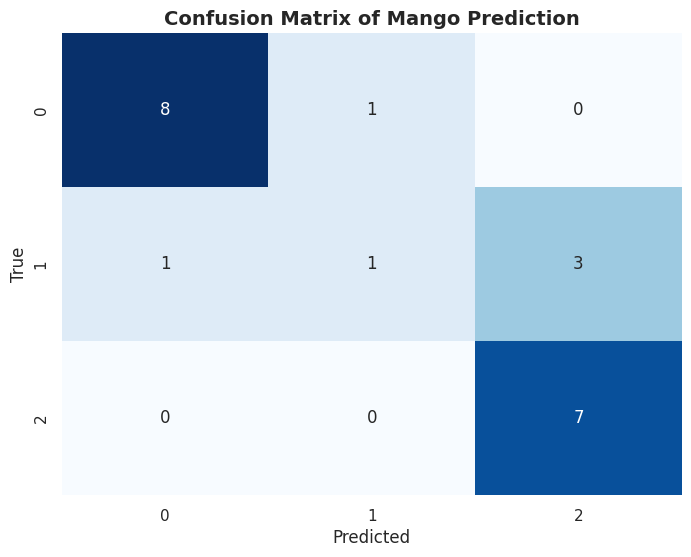

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix of Mango Prediction', fontsize=14, fontweight = 'bold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KMeans

In [58]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [60]:
X = df.drop(['CustomerID','Age','Genre'], axis=1)

In [61]:
X.head(), X.shape

(   Annual Income (k$)  Spending Score (1-100)
 0                  15                      39
 1                  15                      81
 2                  16                       6
 3                  16                      77
 4                  17                      40,
 (200, 2))

In [62]:
from sklearn.cluster import KMeans

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)

In [64]:
X[0]

array([-1.73899919, -0.43480148])

In [65]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
unique_labels = np.unique(label)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
unique_labels

array([0, 1, 2], dtype=int32)

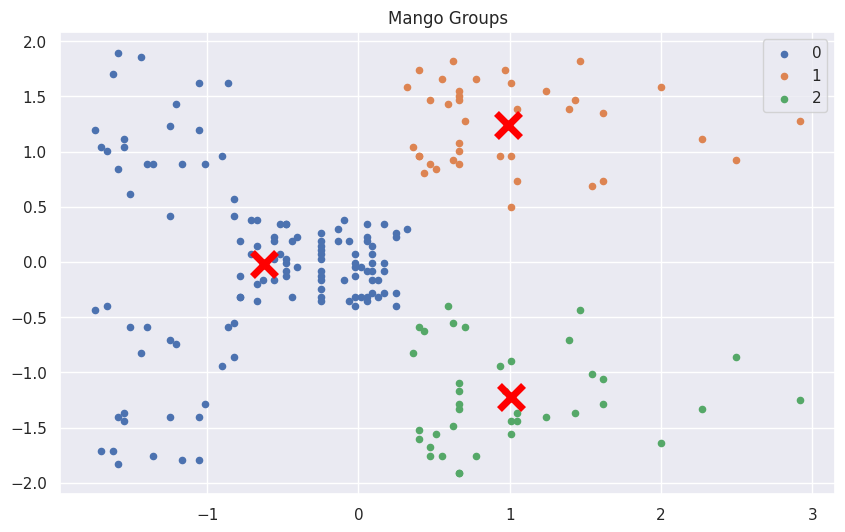

In [67]:
plt.figure(figsize=(10, 6))
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)

plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=300, linewidths=5, color="red")
    
plt.legend()
plt.title('Mango Groups')
plt.show()